In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from mle_toolbox import load_result_logs
from mle_toolbox.utils import load_meta_log


import os
import sys

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from utils.visualize_experiments import (plot_roi_subject_grid, plot_average_scores,
                                         plot_bo_scores, plot_perf_per_layer, plot_best_layer)

In [6]:
num_bo_iters = 50
num_layers = 5

In [45]:
#experiment_dir = "../experiments/roi/elastic_resnet50_bo_50"
#experiment_dir = "../experiments/wb/elastic_resnet50_bo_15"

#experiment_dir = "../experiments/roi/elastic_efficientnet_b3_bo_50"
#experiment_dir = "../experiments/wb/elastic_efficientnet_b3_bo_50"

#experiment_dir = "../experiments/roi/elastic_resnext50_32x4d_bo_50"
#experiment_dir = "../experiments/wb/elastic_resnext50_32x4d_bo_50"

#experiment_dir = "../data/experiments/roi/mlp_efficientnet_b3_bo_50"
#experiment_dir = "../data/experiments/wb/mlp_efficientnet_b3_bo_30"
#experiment_dir = "../data/experiments/roi/elastic_vone_resnet50_bo_50"
#experiment_dir = "../data/experiments/wb/mlp_efficientnet_b3_bo_30"

#experiment_dir = "../data/experiments/roi/elastic_vone_resnet50_at_bo_50"
#experiment_dir = "../data/experiments/wb/elastic_vone_resnet50_at_bo_30"

experiment_dir = "../data/experiments/roi/elastic_250_efficientnet_b3_b50"
#experiment_dir = "../data/experiments/wb/elastic_250_efficientnet_b3_b30"

meta_log, hyper_log = load_result_logs(experiment_dir)

In [46]:
hyper_log.best_bo_score.mean()

0.21761211819118922

# Bayesian Optimization Procedure Across Network Feature Layers

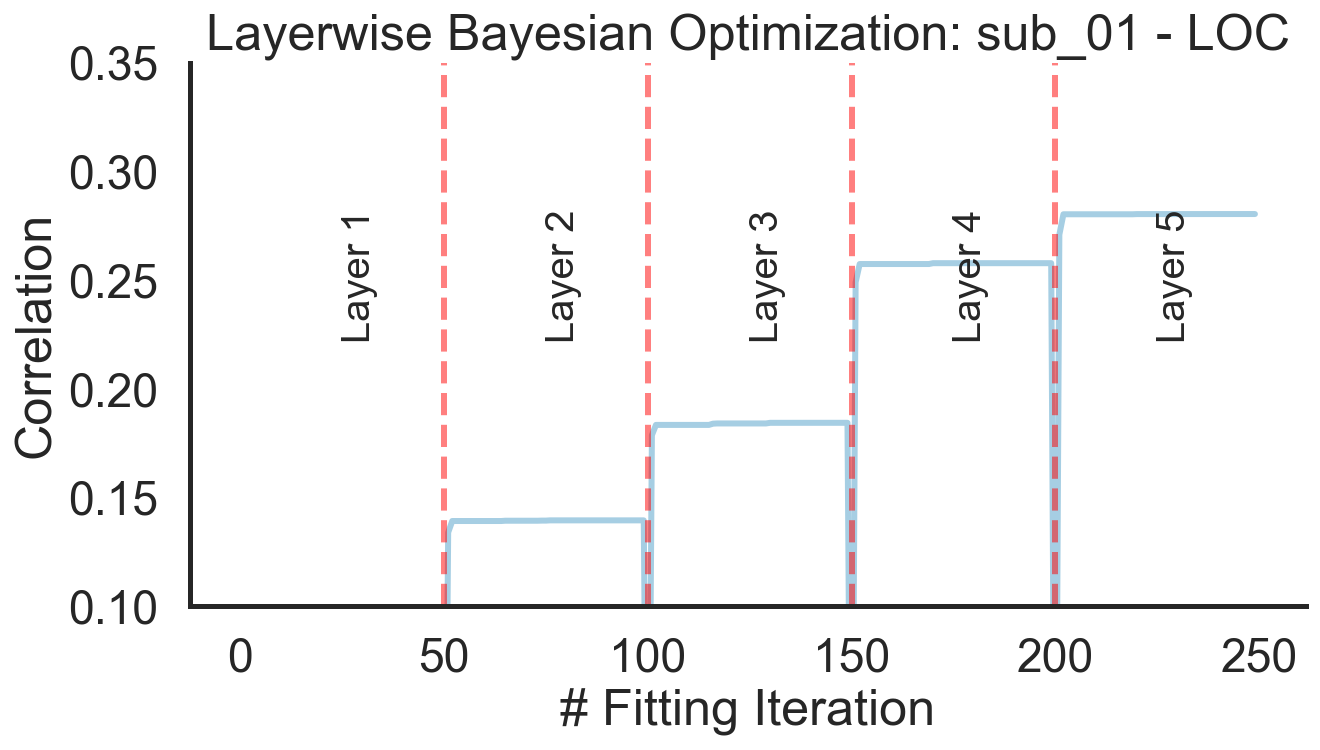

In [47]:
plot_bo_scores(meta_log, "b_1_eval_0", subject_id="sub_01", roi_type="LOC", num_bo_per_layer=num_bo_iters, num_layers=num_layers)

# Performance Across Subjects and ROIs

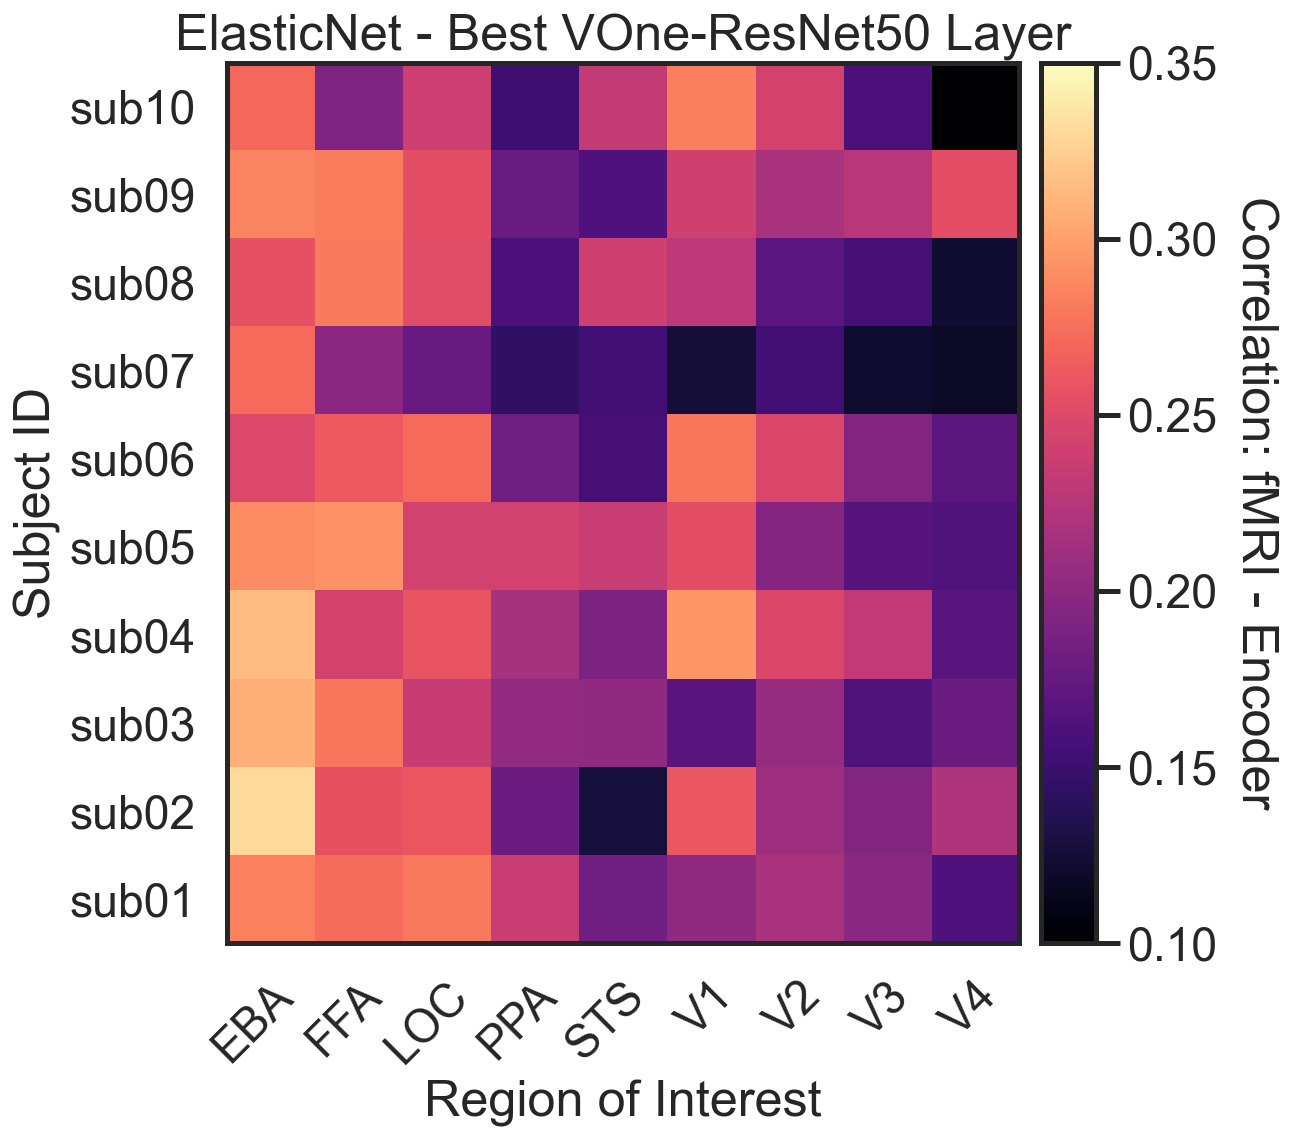

In [48]:
plot_roi_subject_grid(hyper_log, title="ElasticNet - Best VOne-ResNet50 Layer")

# Meaned Scores - Subject and ROI

[0.24895755 0.2284941  0.1924748  0.17934308 0.25560778 0.29412759
 0.26555168 0.20329394 0.18867682]


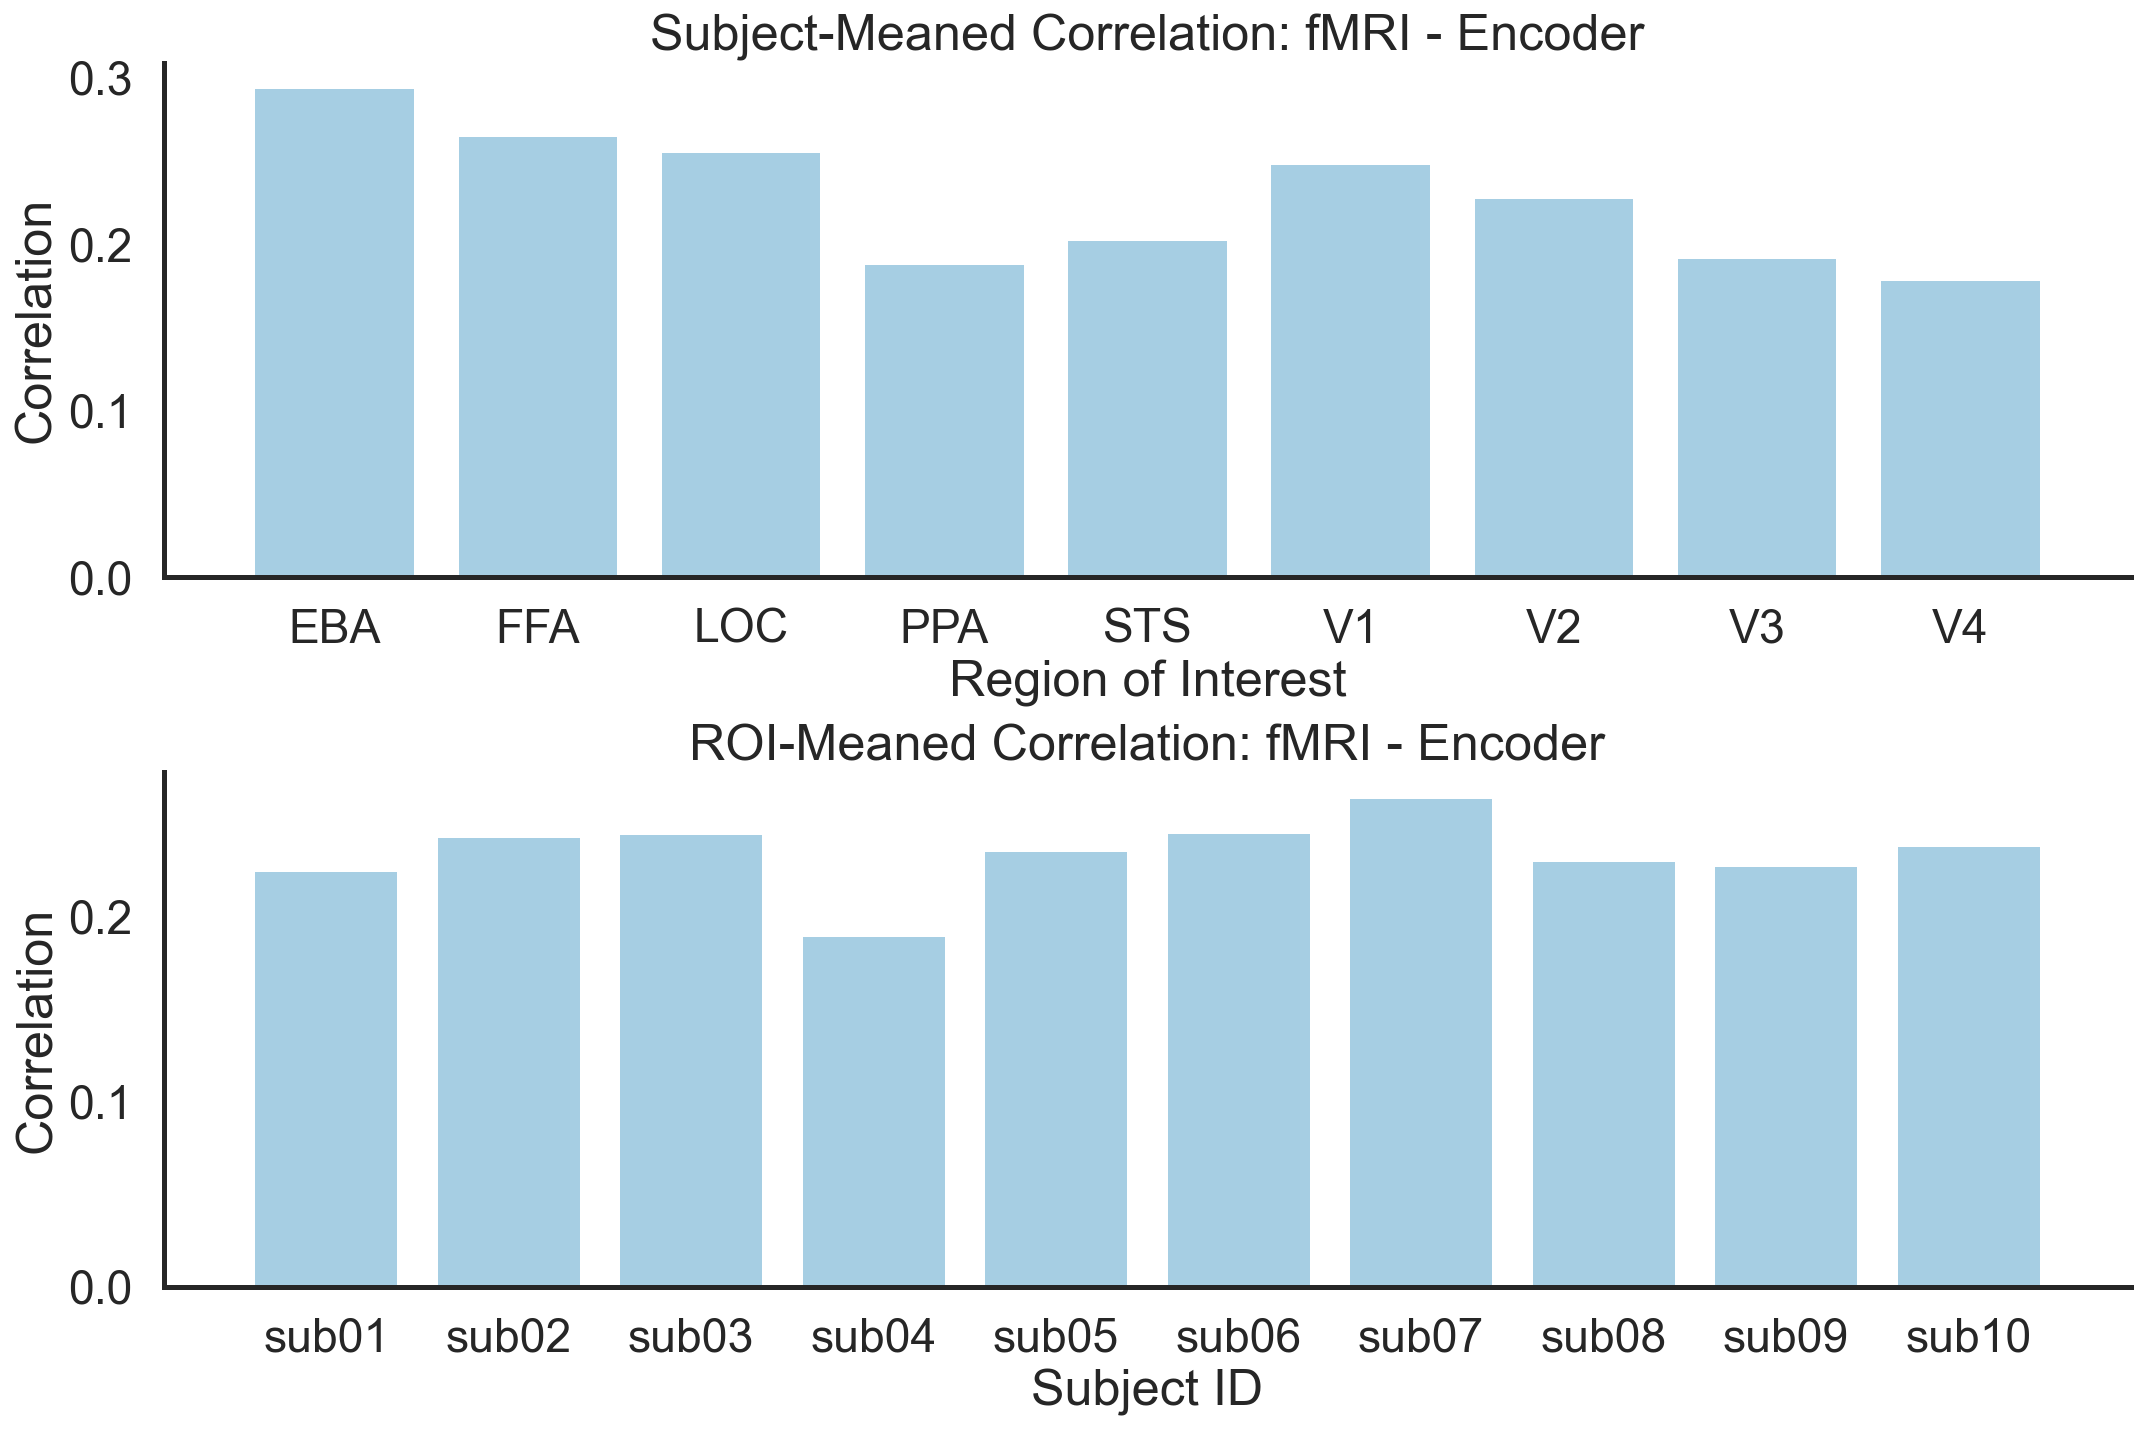

In [29]:
scores = plot_average_scores(hyper_log)
print(scores)

# Performance Per Layer

In [ ]:
plot_perf_per_layer(hyper_log, meta_log, num_bo_per_layer=50, num_layers=5)

# Best Layer Per ROI/Subject

In [ ]:
plot_best_layer(hyper_log, meta_log, num_layers=5,
                num_bo_per_layer=50,
                title="Best Resnext50 Layer per Subject/ROI:")